In [15]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [16]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [17]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

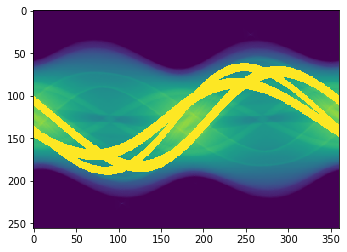

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [19]:
metal3_img.shape

(256, 360)

In [30]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size-1):
    for j in range(30-window_size):
        if 0 in result_img[i:i+window_size+1,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size+1,j:j+window_size]:
                z = 0
            else:
                k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [31]:
k = 0

for i in range(256-window_size-1):
    for j in range(30-window_size):
        if 0 in result_img[i:i+1+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j:j+window_size]:
                z = 0
            else:
                for v in range(window_size):
                    for w in range(window_size):
                        train_data[k,w,v,0] = result_img[i+w,j+v]
                result_data[k,0] = int(result_img[i+window_size,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(4094, 3, 3, 1)
(4094, 1)
Epoch 1/1000
128/128 [==============================] - 0s 2ms/step - loss: 2.0121 - accuracy: 0.4023
Epoch 2/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.9483 - accuracy: 0.4118
Epoch 3/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.9377 - accuracy: 0.4138
Epoch 4/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.9170 - accuracy: 0.4201
Epoch 5/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.9067 - accuracy: 0.4226
Epoch 6/1000
128/128 [==============================] - 0s 2ms/step - loss: 2.0189 - accuracy: 0.4074
Epoch 7/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.8969 - accuracy: 0.4170
Epoch 8/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.9029 - accuracy: 0.4191
Epoch 9/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.9250 - accuracy: 0.4152
Epoch 10/1000
128/128 [==============================] -

128/128 [==============================] - 0s 1ms/step - loss: 1.7139 - accuracy: 0.4607
Epoch 160/1000
128/128 [==============================] - 0s 1ms/step - loss: 1.7401 - accuracy: 0.4475
Epoch 161/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.7579 - accuracy: 0.4492
Epoch 162/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.7174 - accuracy: 0.4514
Epoch 163/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.7339 - accuracy: 0.4497
Epoch 164/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.7413 - accuracy: 0.4519
Epoch 165/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.7163 - accuracy: 0.4555
Epoch 166/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.7641 - accuracy: 0.4485
Epoch 167/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.7262 - accuracy: 0.4524
Epoch 168/1000
128/128 [==============================] - 0s 1ms/step - loss: 1

128/128 [==============================] - 0s 2ms/step - loss: 1.6361 - accuracy: 0.4682
Epoch 316/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6281 - accuracy: 0.4780
Epoch 317/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6704 - accuracy: 0.4634
Epoch 318/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6552 - accuracy: 0.4660
Epoch 319/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6267 - accuracy: 0.4773
Epoch 320/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6949 - accuracy: 0.4573
Epoch 321/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6481 - accuracy: 0.4638
Epoch 322/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6476 - accuracy: 0.4653
Epoch 323/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6457 - accuracy: 0.4580
Epoch 324/1000
128/128 [==============================] - 0s 2ms/step - loss: 1

128/128 [==============================] - 0s 2ms/step - loss: 1.5963 - accuracy: 0.4731
Epoch 472/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6049 - accuracy: 0.4802
Epoch 473/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6399 - accuracy: 0.4651
Epoch 474/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6151 - accuracy: 0.4704
Epoch 475/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6005 - accuracy: 0.4731
Epoch 476/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5979 - accuracy: 0.4726
Epoch 477/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5926 - accuracy: 0.4756
Epoch 478/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5813 - accuracy: 0.4775
Epoch 479/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.6006 - accuracy: 0.4753
Epoch 480/1000
128/128 [==============================] - 0s 2ms/step - loss: 1

128/128 [==============================] - 0s 2ms/step - loss: 1.5849 - accuracy: 0.4800
Epoch 550/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5935 - accuracy: 0.4761
Epoch 551/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5712 - accuracy: 0.4836
Epoch 552/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5608 - accuracy: 0.4844
Epoch 553/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5539 - accuracy: 0.4795
Epoch 554/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5646 - accuracy: 0.4885
Epoch 555/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5751 - accuracy: 0.4814
Epoch 556/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5657 - accuracy: 0.4807
Epoch 557/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5769 - accuracy: 0.4780
Epoch 558/1000
128/128 [==============================] - 0s 2ms/step - loss: 1

128/128 [==============================] - 0s 2ms/step - loss: 1.5281 - accuracy: 0.4841
Epoch 706/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5143 - accuracy: 0.4883
Epoch 707/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5281 - accuracy: 0.4905
Epoch 708/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5284 - accuracy: 0.4936
Epoch 709/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5349 - accuracy: 0.4831
Epoch 710/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5266 - accuracy: 0.4924
Epoch 711/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5102 - accuracy: 0.4900
Epoch 712/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5467 - accuracy: 0.4797
Epoch 713/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.5174 - accuracy: 0.4949
Epoch 714/1000
128/128 [==============================] - 0s 2ms/step - loss: 1

128/128 [==============================] - 0s 2ms/step - loss: 1.4944 - accuracy: 0.5051
Epoch 862/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.4924 - accuracy: 0.5002
Epoch 863/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.4782 - accuracy: 0.4990
Epoch 864/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.4835 - accuracy: 0.5002
Epoch 865/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.4747 - accuracy: 0.5024
Epoch 866/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.4786 - accuracy: 0.4954
Epoch 867/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.4951 - accuracy: 0.4973
Epoch 868/1000
128/128 [==============================] - 0s 2ms/step - loss: 1.4861 - accuracy: 0.4973
Epoch 869/1000
128/128 [==============================] - ETA: 0s - loss: 1.4754 - accuracy: 0.50 - 0s 2ms/step - loss: 1.4783 - accuracy: 0.5000
Epoch 870/1000
128/128 [=============

In [32]:
for i in range(256-window_size-1):
    for j in range(30-window_size):
        if result_img[i+window_size,j] == 300:
            test_data = np.zeros((1,window_size,window_size,1))
            for v in range(window_size):
                for w in range(window_size):
                    test_data[0,w,v,0] = result_img[i+w,j+v]
            prediction = model.predict(test_data)
            result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])

219
217
227
227
227
239
239
234
234
250
250
242
239
234
250
250
250
250
242
234
229
250
250
250
250
250
239
234
234
250
250
250
250
250
250
242
242
234
250
250
250
250
250
250
250
250
242
234
250
250
250
250
250
250
250
250
250
242
239
250
250
250
250
250
250
250
250
250
250
250
239
234
250
250
250
250
250
250
250
250
250
250
250
250
242
234
250
250
250
250
250
250
250
250
250
250
250
250
242
239
250
250
250
250
250
250
250
250
250
250
250
250
250
239
250
250
250
250
250
250
250
250
250
250
250
250
239
250
250
250
250
250
250
250
250
250
250
250
245
239
234
250
250
250
250
250
250
250
250
250
250
250
242
239
232
250
250
250
250
250
250
250
250
250
250
242
234
227
250
250
250
250
250
250
250
250
250
242
234
232
227
250
250
250
250
250
250
250
250
242
239
234
234
227
250
250
250
250
250
250
250
250
250
239
239
234
229
250
250
250
250
250
250
250
250
250
250
242
234
227
217
250
250
250
250
250
250
250
250
250
234
227
217
211
250
250
250
250
250
250
250
250
234
227
219
214
250
250
250
250


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

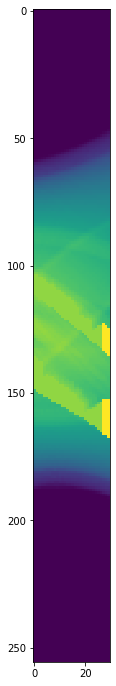

In [33]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:30])
plt.colorbar

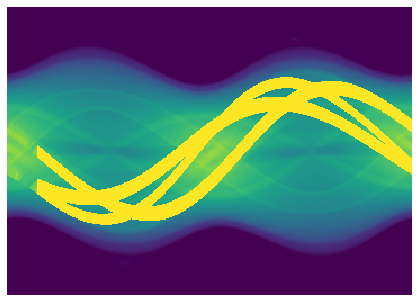

In [14]:
plt.imshow(result_img)
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/RCNN3(30).png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [207]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)